In [ ]:
from fastai.vision.all import *

In [ ]:
!unzip Data.zip

Archive:  Data.zip
   creating: Data/Al Masmak Palace/
  inflating: Data/Al Masmak Palace/masmak (1).png  
  inflating: Data/Al Masmak Palace/masmak (10).png  
  inflating: Data/Al Masmak Palace/masmak (11).png  
  inflating: Data/Al Masmak Palace/masmak (12).png  
  inflating: Data/Al Masmak Palace/masmak (13).png  
  inflating: Data/Al Masmak Palace/masmak (14).png  
  inflating: Data/Al Masmak Palace/masmak (15).png  
  inflating: Data/Al Masmak Palace/masmak (16).png  
  inflating: Data/Al Masmak Palace/masmak (17).png  
  inflating: Data/Al Masmak Palace/masmak (18).png  
  inflating: Data/Al Masmak Palace/masmak (19).png  
  inflating: Data/Al Masmak Palace/masmak (2).png  
  inflating: Data/Al Masmak Palace/masmak (20).png  
  inflating: Data/Al Masmak Palace/masmak (21).png  
  inflating: Data/Al Masmak Palace/masmak (22).png  
  inflating: Data/Al Masmak Palace/masmak (23).png  
  inflating: Data/Al Masmak Palace/masmak (24).png  
  inflating: Data/Al Masmak Palace/masmak (25)

In [ ]:
# Define the path to your data folder
path = Path('/content/drive/MyDrive/Colab Notebooks/Datasets/GP_Photos')

# Define a DataBlock
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  # ImageBlock for handling images, CategoryBlock for labels
    get_items=get_image_files,           # Function to get the image files
    splitter=RandomSplitter(valid_pct=0.2, seed=42),  # Split the data into training and validation sets
    get_y=parent_label,                  # Use the parent folder name as the label
    item_tfms=Resize(460),               # Resize images to a consistent size
    batch_tfms=aug_transforms(size=224)  # Apply data augmentation transforms
)

# Create a DataLoader
dataloader = dblock.dataloaders(path, bs=64, num_workers=4)

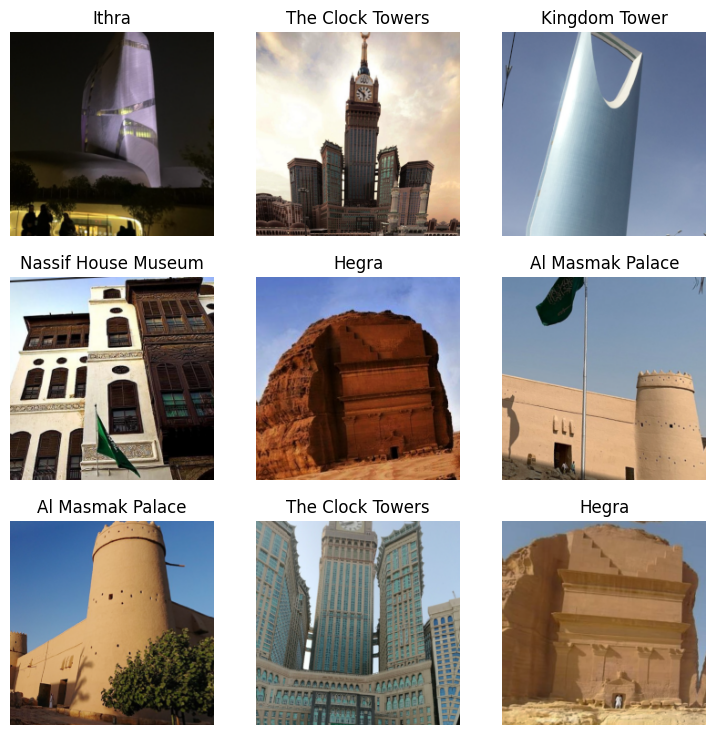

In [ ]:
dataloader.show_batch()

In [ ]:
learn = vision_learner(dataloader, resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 153MB/s]


SuggestedLRs(valley=0.0020892962347716093)

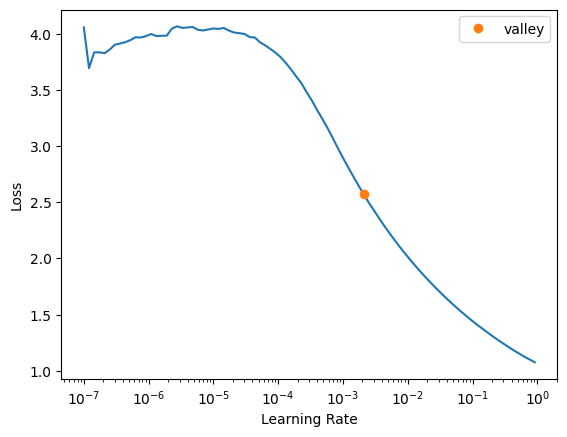

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(40, 1e-3)
# learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,3.987318,2.732532,0.788462,00:39


epoch,train_loss,valid_loss,error_rate,time
0,2.164996,1.839680,0.634615,00:09
1,1.809807,1.279427,0.403846,00:08
2,1.556613,0.881934,0.211538,00:10
3,1.347403,0.601778,0.115385,00:10
4,1.159176,0.397556,0.076923,00:09
5,0.997981,0.263768,0.076923,00:08
6,0.865144,0.184218,0.057692,00:10
7,0.760188,0.135196,0.019231,00:09
8,0.669615,0.104742,0.019231,00:08
9,0.587545,0.076845,0.019231,00:10


In [ ]:
learn.export('Landmarks_model.pkl')

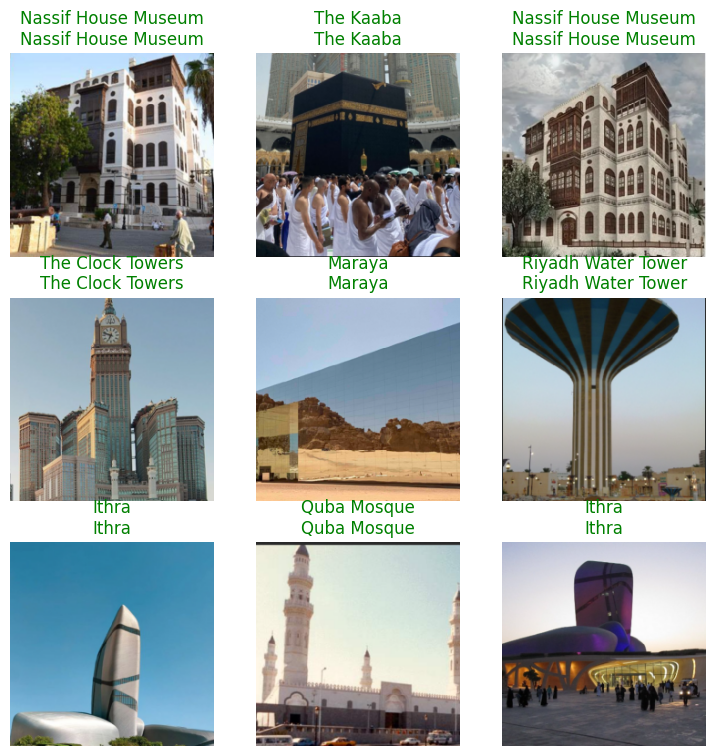

In [ ]:
learn.show_results()

In [ ]:
testImage = PILImage.create('/content/WhatsApp Image 2023-11-06 at 9.07.12 PM.jpeg').resize((182, 268))
testImage.size

(182, 268)

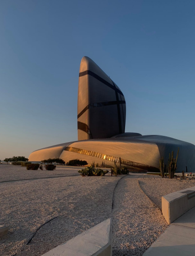

In [ ]:
Image.open('/content/WhatsApp Image 2023-11-06 at 9.07.12 PM.jpeg').to_thumb(256,256)

In [ ]:
learn = load_learner('/content/SaudiLandmarkClassifier.pkl')

In [ ]:
prediction = learn.predict('/content/nassif house museum.jpg')
prediction

predicted_class = prediction[0]
predicted_index = prediction[1]
probabilities = prediction[2]


probability_of_predicted_class = probabilities[predicted_index].item() 

print(f"Predicted Class: {predicted_class}")
print(f"Probability of Predicted Class: {probability_of_predicted_class}")

Predicted Class: Nassif House Museum
Probability of Predicted Class: 0.9997925162315369


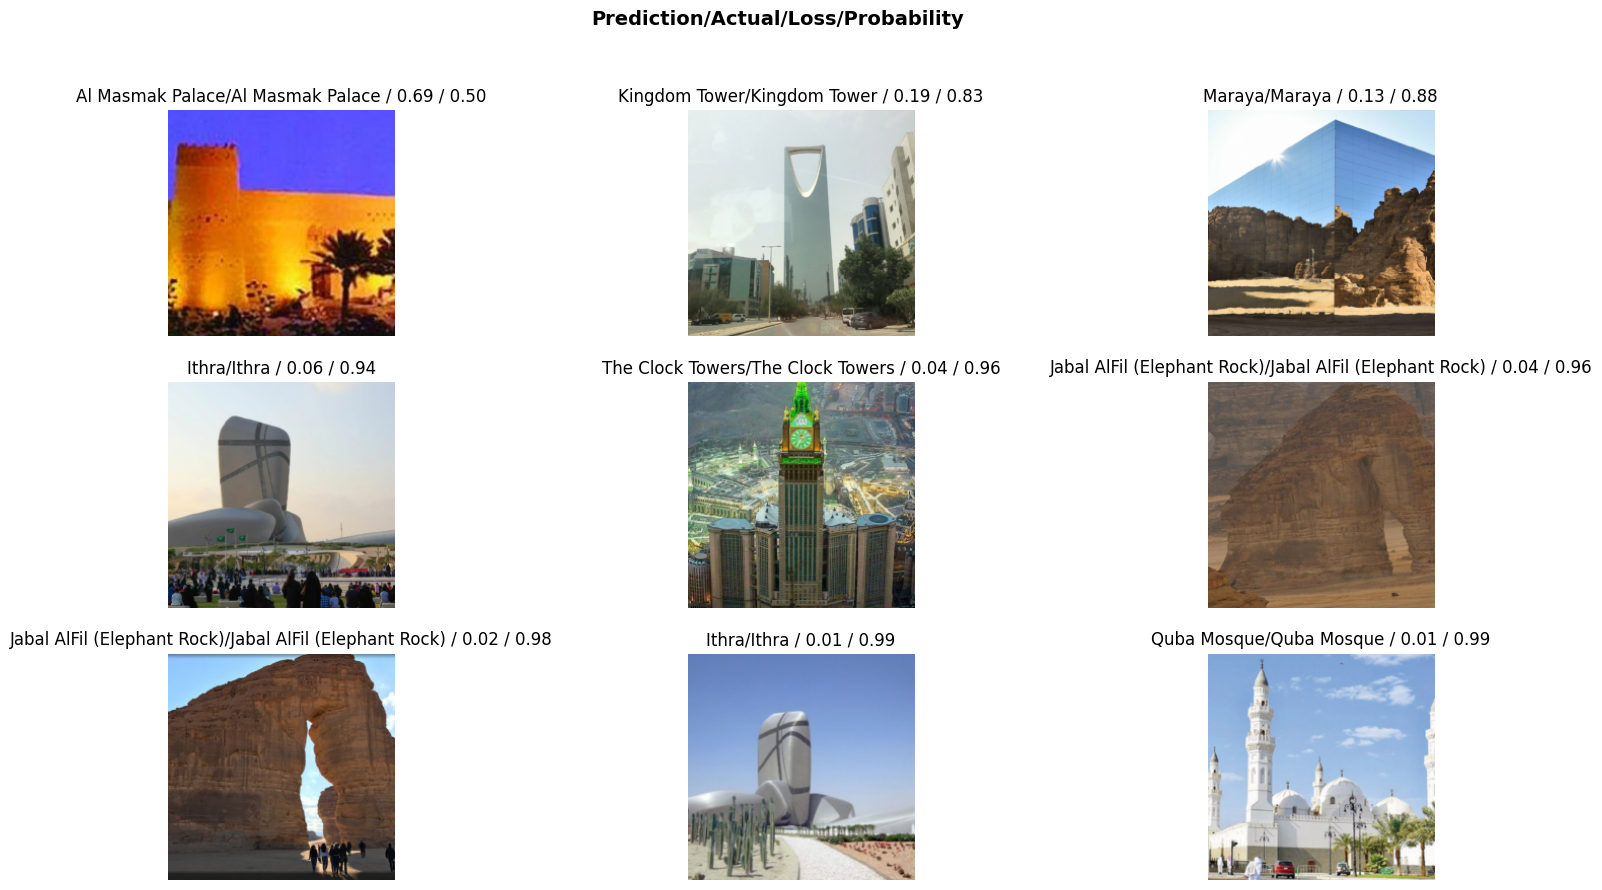

In [ ]:
interp = Interpretation.from_learner(learn)

# Plot top losses
interp.plot_top_losses(9, figsize=(19,10))

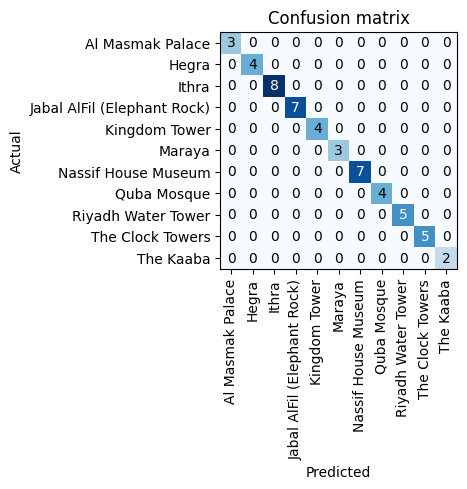

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()